# Innlevering 2, Oppgave 1-6

## Oppgave 1 \*


La $X$ være en diskret fordelt stokastisk variabel med punktsannsynlighet $f(x)=P(X=x)$ som angitt i følgende tabell.

| $x$ |     | $f(x)$ |
| :-: | --- | :----: |
| $0$ |     | $0.05$ |
| $1$ |     | $0.10$ |
| $2$ |     | $0.25$ |
| $3$ |     | $0.40$ |
| $4$ |     | $0.15$ |
| $5$ |     | $0.05$ |

- Finn $P(X \leq 2)$

Python-koden under definerer en funksjon <em>simX</em> som genererer $n$ realisasjoner av $X$. Denne funksjonen kan du benytte til å besvare neste spørsmål. <em>Merk: Studer koden slik at du senere selv kan skrive pythonfunksjoner.</em>


In [280]:
# Importer nødvendige biblioteker, denne cellen må kjøres før annen kode.
import numpy as np
import matplotlib.pyplot as plt

In [281]:
# UTLEVERT KODE (ingenting her skal endres)
# punktsannsynlighet
f_x = np.array([0.05, 0.10, 0.25, 0.40, 0.15, 0.05])

# kumulativ fordelingsfunksjon
F_x = np.cumsum(f_x)


def simX(n: int) -> np.ndarray:
    # verdimengde
    x = np.arange(6)
    # for lagring av realisasjoner
    x_sim = np.zeros(n)
    for i in range(n):  # vi simulerer hver og en x for seg
        u = np.random.uniform()  # en realisasjon fra U(0,1)
        if u < F_x[0]:
            # hvis u er mindre enn den laveste verdien i F_x vil vi at
            # realisasjonen skal være 0
            x_sim[i] = x[0]
        elif u <= F_x[1]:
            # hvis u er mindre enn den nest laveste verdien (men større
            # enn laveste) vil vi at x skal bli 1
            x_sim[i] = x[1]
        elif u <= F_x[2]:
            x_sim[i] = x[2]
        elif u <= F_x[3]:
            x_sim[i] = x[3]
        elif u <= F_x[4]:
            x_sim[i] = x[4]
        elif u > F_x[4]:
            x_sim[i] = x[5]
    return x_sim

- Skriv python-kode som benytter stokastisk simulering, og spesielt <em>simX</em>-funksjonen definert over,
  til å finne tilnærmet verdi for $P(X\leq 2)$. Benytt for eksempel $n=1000$ og kjør gjerne
  koden din flere ganger slik at du får en følelse av
  nøyaktigheten av tilnærmelsene. Sammenlign verdiene du finner her med den
  eksakte verdiene du fant over (og i Skriftlig innlevering 1).


In [282]:
# Antall realisasjoner man skal bruke
n = 1_000

# Simuler realisasjoner av X ved å kalle på simX-funksjonen i cellen over
simulerte_X = simX(n)

# Approksimer sannsynligheten
P_X_le_2 = sum(simulerte_X <= 2) / n

# Skriv ut resultatet
print(f"Approksimert P(X≤2): {P_X_le_2:.4f}")
print(f"Eksakt P(X≤2): {F_x[2]}")

Approksimert P(X≤2): 0.4230
Eksakt P(X≤2): 0.4


## Oppgave 2 \*

Vi skal igjen studere den diskrete sannsynlighetsfordelingen fra oppgave 1.

- Regn ut forventningsverdien til $X$, $E[X]$
- Regn ut variansen, $\text{Var}(X)$, og standardavviket, $\text{SD}[X]$.
- Bruk <em>simX</em>-funksjonen definert over til å finne tilnærmede verdier for $E[X]$ og $\text{SD}[X]$. Sammenlign tilnærmingene med de eksakte verdiene du regnet ut over. Kjør gjerne simuleringen (f.eks med $n = 1000$ flere ganger).


In [283]:
E_x = float(np.mean(simulerte_X))
E_x_exact = sum(x * f_x for x, f_x in enumerate(f_x))
var_x = sum(elem**2 for elem in simulerte_X) / n - E_x**2
var_x_exact = sum(x**2 * f_x for x, f_x in enumerate(f_x)) - E_x_exact**2

print(f"Approksimert E(x): {E_x:.4f}")
print(f"Eksakt E(x): {E_x_exact:.4f}")
print(f"Approksimert Var(x): {var_x:.4f}")
print(f"Eksakt Var(x): {var_x_exact:.4f}")
print(f"Approksimert SD(x): {np.sqrt(var_x):.4f}")
print(f"Eksakt SD(x): {np.sqrt(var_x_exact):.4f}")

Approksimert E(x): 2.5980
Eksakt E(x): 2.6500
Approksimert Var(x): 1.3284
Eksakt Var(x): 1.3275
Approksimert SD(x): 1.1526
Eksakt SD(x): 1.1522


## Oppgave 3 \*

La $X$ være en stokastisk variabel som beskriver hvor lang tid en komponent har fungert i det den svikter.
Vi kaller da $X$ for <em>levetiden</em> for komponenten.

Levetiden $X$ (målt i antall år) til en bestemt type mekaniske komponenter har vist seg å
følge en fordeling med kumulativ fordelingsfunksjon gitt ved
\begin{align*}
F_X(x) = 1 - \exp\left\{ -\frac{x^2}{\alpha}\right\}; x\geq 0,
\end{align*}
der $\alpha$ er en parameter som beskriver kvaliteten til komponentene.

### Deloppgave a)

- Finn sannsynlighetstettheten til $X$, $f_X(x)$. Eventuelt hent denne fra din besvarelse av
  Skriftlig innlevering 1.

### Deloppgave b)

La $U\sim \mbox{Unif}[0,1]$.

- Finn en formel for hvordan man fra $U$ kan definere $X$ slik at kumulativ fordeling for $X$
  blir som angitt over.
- Skriv en python-funksjon som genererer $n$ realisasjoner av $X$. La funksjonen ha to
  input-parametre, antall realisasjoner $n$ og verdien til kvalitetsparameteren $\alpha$.
  Benytt funksjonen til å generere (for eksempel) $n=10\ 000\ 000$ realisasjoner av $X$ med
  (for eksempel) $\alpha=1$, og lag et sannsynlighetshistogram for de genererte verdiene. Spesifiser at histogrammet skal ha 100 intervaller, se kode under.
  Plott også sannsynlighetstettheten $f_X(x)$ i samme plott som
  sannsynlighetshistogrammet. Ser det ut til at du har generert
  realisasjoner av $X$ på korrekt måte?


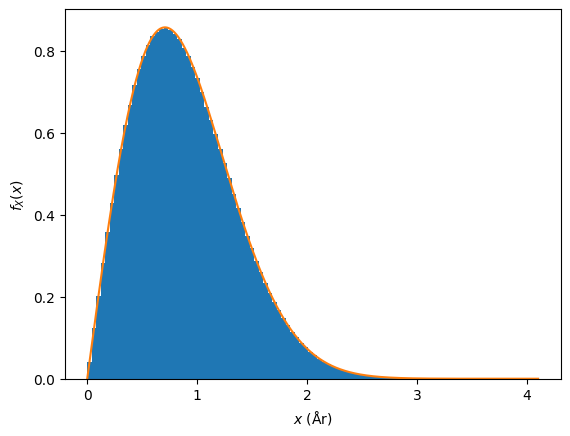

In [284]:
def generateX(n: int, alpha: float) -> np.ndarray:
    u = np.random.uniform(size=n)  # array med n elementer.
    return np.sqrt(-alpha * np.log(1 - u))


def f_X(x: np.ndarray, alpha: float) -> np.ndarray:
    return 2.0 * x / alpha * np.exp(-(x**2) / alpha)


# Sett antall realisasjoner og verdien til alpha
n = 10_000_000
alpha = 1.0

# simuler realisasjoner av X
simulerte_X = generateX(n, alpha)

# Lag sannsynlighetshistogram for de simulerte verdiene, vi spesifiserer
# antall intervaller ved å sette "bins=100"
plt.hist(
    simulerte_X, density=True, bins=100
)  # density=True gjør at vi får et sannsynlighetshistogram

# Angi navn på aksene
plt.xlabel("$x$ (År)")
plt.ylabel("$f_X(x)$")

# Regn ut og plott sannsynlighetstettheten til X på samme plott
x = np.linspace(0, max(simulerte_X), 1_000)
plt.plot(x, f_X(x, alpha))

# Avslutt med å generere alle elementene du har plottet
plt.show()

#### Her er deloppgave b) slutt.


### Deloppgave c)

Et instrument inneholder fem komponenter av denne typen, to av disse komponentene har kvalitetsparameter $\alpha = 1$ og de andre tre komponentene har $\alpha=1.2$. De fem komponentene svikter uavhengig av hverandre og instrumentet fungerer så lenge minst tre av de fem komponentene fungerer. La $Y$ betegne levetiden til instrumentet.

- Skriv en python-funksjon som genererer $n$ realisasjoner av $Y$. Funksjonen skal ha en input-parameter, nemlig antall realisasjoner $n$. Benytt funksjonen til å genererere (for eksempel) $n=10\ 000$ realisasjoner av $Y$, og lag et sannsynlighetsistogram for de genererte verdiene.
- Benytt python-funksjonen til å finne tilnærmede verdier for $P(Y\geq 1)$ og $P(Y\geq 1|Y\geq 0.75)$.


P(Y≥1): 0.4348
P(Y≥1|Y≥0.75) = P(Y≥1)/P(Y≥0.75): 0.6916


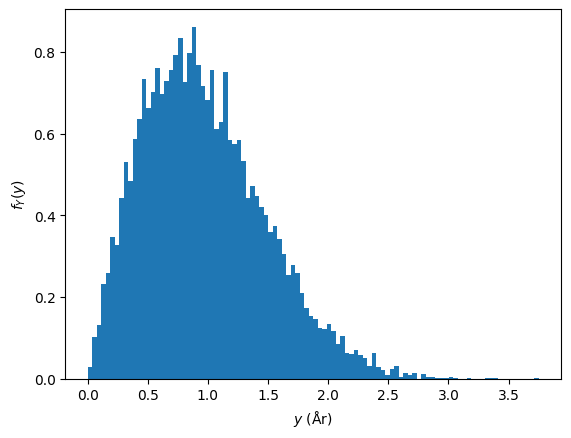

In [285]:
# definer funksjonen og benytt denne som angitt i oppgaven
def simY(n: int) -> np.ndarray:
    alphas = [1.0, 1.0, 1.2, 1.2, 1.2]
    lifetimes = np.sort([generateX(n, alpha) for alpha in alphas])
    return lifetimes[2]  # tredje lengste levetiden


n = 10_000
simulerte_Y = simY(n)

# Sannsynligheter
P_Y_ge_1 = sum(simulerte_Y >= 1) / n
P_Y_ge_0_75 = sum(simulerte_Y >= 0.75) / n
print(f"P(Y≥1): {P_Y_ge_1:.4f}")
print(f"P(Y≥1|Y≥0.75) = P(Y≥1)/P(Y≥0.75): {P_Y_ge_1 / P_Y_ge_0_75:.4f}")

plt.hist(simulerte_Y, density=True, bins=100)
plt.xlabel("$y$ (År)")
plt.ylabel("$f_Y(y)$")
plt.show()

## Oppgave 4 \*

Vi skal igjen studere levetidsfordelingen fra Oppgave 3.

- Finn en formel for $E[X]$ (som funksjon av $\alpha$). Du kan her uten bevis benytte at
  $$
  \int_{-\infty}^\infty e^{-x^2}dx = \sqrt{\pi}.
  $$
  Du kan verifisere om resultatet virker rimelig ved å sammenlikne med histogrammet fra oppgave 3.
- Benytt python-funksjonen du har implementert i oppgave 3 c til å finne tilnærmede verdier for $E[Y]$ og $\mbox{SD}[Y]$.


In [286]:
print(f"Approksimert E(Y) = {np.mean(simulerte_Y):.4f}")
print(f"Eksakt E(Y) = {np.sqrt(np.pi * 1.2) / 2:.4f}")  # Valgte 1.2 for alpha

Approksimert E(Y) = 0.9735
Eksakt E(Y) = 0.9708
